In [17]:
import os
import pandas as pd
import urllib.request
import requests
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#!conda install -c conda-forge folium=0.5.0 --yes
# import folium # map rendering library
#! conda install -c anaconda beautifulsoup4 --yes
from bs4 import BeautifulSoup

print('Libraries imported.')
#!conda install -c anaconda lxml --yes
!conda install -c anaconda html --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |           py37_0         162 KB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         195 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     anaconda/linux-64::beautifulsoup4-4.9.1-py37_0
  soupsieve          anaconda/noarch::soupsieve-2.0.1-py_0



beautifulsoup4-4.9.1 | 162 KB    | ##################################### | 100% 
sou

In [2]:
def Obj_To_Float(df,col,length=4):
    length = '|S'+str(length)
    df[col] = df[col].astype(length)
    df[col] = df[col].str.decode(encoding = 'UTF-8') 
    df[col] = df[col].astype('float')
    print(df[col].dtypes)


In [37]:
# url = 'https://gol.gg/teams/list/season-S4/split-ALL/region-ALL/tournament-ALL/week-ALL/'

# #This is the request to get the info and then reading to get all the html info
# html = urllib.request.urlopen(url).read()

# #Soups cleans the html tags to make it easier to parse thru it
# soup = BeautifulSoup(html,'lxml')
# #soup1 = soup.find
# soup_str = str(soup1)
# #print(soup_str)

# s4 = pd.read_html(soup_str)
# #type(d)
# df1 =s4[2]
# df1.head()

In [4]:
# Top4 = {'S6': {'teams':['SK Telecom T1','Samsung Galaxy', 'H2k-Gaming','ROX Tigers'],
#                 'index':[]},
#         'S7': {'teams':['Samsung Galaxy','SK Telecom T1','Royal Never Give Up','Team WE'],
#                'index':[]},
#         'S8': {'teams':['Invictus Gaming','Fnatic','G2 Esports','Cloud9'],
#                'index':[]}}
indexTop4 = []
url = 'https://gol.gg/teams/list/season-S4/split-ALL/region-ALL/tournament-ALL/week-ALL/'
s4 = pd.read_html(url)
#type(d)
df1 =s4[3]

url = 'https://gol.gg/teams/list/season-S6/split-ALL/region-ALL/tournament-ALL/week-ALL/'
d = pd.read_html(url)
#type(d)
df2 =d[3]

#type(d)
url = 'https://gol.gg/teams/list/season-S7/split-ALL/region-ALL/tournament-ALL/week-ALL/'
b = pd.read_html(url)
url = 'https://gol.gg/teams/list/season-S8/split-ALL/region-ALL/tournament-ALL/week-ALL/'
c = pd.read_html(url)

df6=b[3]
df8=c[3]
df3= df1.append(df2)
df7=df3.append(df6)
df9= df7.append(df8)
#df7 = df7.reset_index(drop=True)

df = df9.reset_index(drop=True)
df.head(60)



Top4 = {'S4': {'teams':['Samsung Galaxy White','Star Horn Royal Club' ,'Samsung Galaxy Blue','OMG']},
        'S6': {'teams':['SK Telecom T1','Samsung Galaxy', 'H2k-Gaming','ROX Tigers']},
        'S7': {'teams':['Samsung Galaxy','SK Telecom T1','Royal Never Give Up','Team WE']},
        'S8': {'teams':['Invictus Gaming','Fnatic','G2 Esports','Cloud9']}}

dfcopy = df

df['Region'].replace(np.nan,'NA',inplace = True)
df.drop(['HERPG','HER%','Game duration'],axis=1,inplace=True)
df.replace('-',-1,inplace= True)

Obj_To_Float(df,'FB%')
Obj_To_Float(df,'FT%')
Obj_To_Float(df,'Win rate',3)


fbMean=df['FB%'].mean()
ftMean=df['FT%'].mean()

df['FT%'].replace(-1,ftMean,inplace= True)
df['FB%'].replace(-1,fbMean,inplace= True)



Obj_To_Float(df,'DRA@15',5)
Obj_To_Float(df,'TD@15')
Obj_To_Float(df,'GD@15',6)

draMean=df['DRA@15'].mean()
tdMean=df['TD@15'].mean()
gdMean=df['GD@15'].mean()

df['DRA@15'].replace(-1,draMean ,inplace= True)
df['TD@15'].replace(-1,tdMean,inplace= True)
df['GD@15'].replace(-1,gdMean,inplace= True)

print(df.dtypes)

df['Top 4'] = 0
for season in df['Season'].unique():
    #print(i)
    dftS = df[df.Season == season]
    dft4 = dftS[dftS['Name'].isin(Top4[season]['teams'])]
    l = list(dft4.index)
    indexTop4.append(l)
print(indexTop4)

for part in indexTop4:
    for l in part:
        df.at[l,'Top 4']=1
#df.head(5)



#df.drop(dropRows, inplace = True)
df.head(212)

#df['Top 4'] = 0
# test =df[df['Name'].isin(Top4['S6']['teams'])]
# l = list(test.index)
# indexTop4.append(l)
#df.dtypes

#dfnew.head()
# #print(df.describe())
# #print(df.dtypes)
# df.head(16)
# df1=df.groupby(df['Season'])
# df1.head(16)

IndexError: list index out of range

In [47]:
df.replace(-1,'-',inplace= True)
df.replace('-',np.nan,inplace= True)
dfempty = df.isna()

row_has_NaN = dfempty.any(axis=1)
rows_with_NaN = df[row_has_NaN]
dropRows = list(rows_with_NaN.index)
#print(rows_with_NaN)
#dropRows.remove(117)
print(dropRows)

[44, 51, 57, 61, 67, 72, 76, 78, 88, 92, 100, 102, 116, 117, 136, 142, 145, 148, 157, 169, 178, 190, 192, 211]


In [52]:
#df.head(118)

In [53]:
df.drop(dropRows, inplace = True)

KeyError: '[ 44  51  57  61  67  72  76  78  88  92 100 102 116 117 136 142 145 148\n 157 169 178 190 192 211] not found in axis'

In [54]:
#pd.to_numeric(df['NASH%']).dtypes

In [55]:
df.dtypes

Name              object
Season            object
Region            object
Games              int64
Win rate         float64
K:D              float64
GPM                int64
GDM                int64
Kills / game     float64
Deaths / game    float64
Towers killed    float64
Towers lost      float64
FB%              float64
FT%              float64
DRAPG            float64
DRA%             float64
DRA@15           float64
TD@15            float64
GD@15            float64
NASHPG            object
NASH%             object
CSM              float64
DPM               object
WPM               object
VWPM              object
WCPM              object
Top 4              int64
dtype: object

In [56]:
Obj_To_Float(df,'NASH%')
nashMean=df['NASH%'].mean()
df['NASH%'].replace(-1,nashMean,inplace= True)

float64


In [57]:
Obj_To_Float(df,'NASHPG')
Obj_To_Float(df,'DPM')
Obj_To_Float(df,'WPM')
Obj_To_Float(df,'VWPM')
Obj_To_Float(df,'WCPM')
df.dtypes

float64
float64
float64
float64
float64


Name              object
Season            object
Region            object
Games              int64
Win rate         float64
K:D              float64
GPM                int64
GDM                int64
Kills / game     float64
Deaths / game    float64
Towers killed    float64
Towers lost      float64
FB%              float64
FT%              float64
DRAPG            float64
DRA%             float64
DRA@15           float64
TD@15            float64
GD@15            float64
NASHPG           float64
NASH%            float64
CSM              float64
DPM              float64
WPM              float64
VWPM             float64
WCPM             float64
Top 4              int64
dtype: object

In [58]:
df.dtypes

Name              object
Season            object
Region            object
Games              int64
Win rate         float64
K:D              float64
GPM                int64
GDM                int64
Kills / game     float64
Deaths / game    float64
Towers killed    float64
Towers lost      float64
FB%              float64
FT%              float64
DRAPG            float64
DRA%             float64
DRA@15           float64
TD@15            float64
GD@15            float64
NASHPG           float64
NASH%            float64
CSM              float64
DPM              float64
WPM              float64
VWPM             float64
WCPM             float64
Top 4              int64
dtype: object

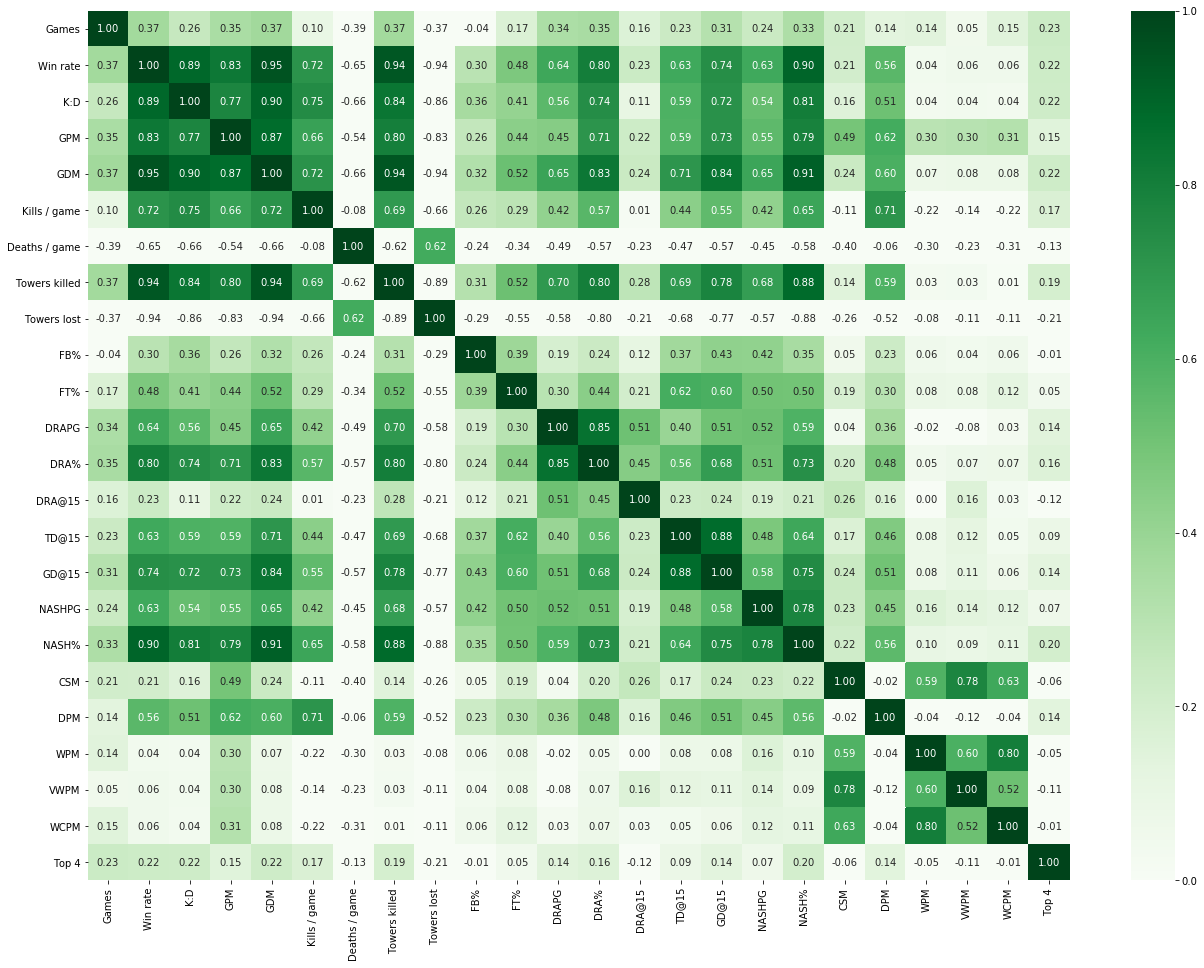

In [59]:


# url = 'https://gol.gg/teams/list/season-ALL/split-ALL/region-ALL/tournament-World%20Championship%202016/week-ALL/'
# d = pd.read_html(url)
# #type(d)
# df =d[1]
# #fbMean=df['FB%'].mean()
# # ftMean=df['FT%'].mean()
# df['Region'].replace(np.nan,'NA',inplace = True)
# df.drop(['HERPG','HER%','Game duration'],axis=1,inplace=True)
# df['FT%'].replace('-',-1,inplace= True)
# df['FB%'].replace('-',-1,inplace= True)
# Obj_To_Float('FB%')
# Obj_To_Float('FT%')
# fbMean=df['FB%'].mean()
# ftMean=df['FT%'].mean()
# df['FT%'].replace(-1,ftMean,inplace= True)
# df['FB%'].replace(-1,fbMean,inplace= True)
# df['Top 4'] = 0
# top4 = []
# #print(df.describe())
# #print(df.dtypes)
# df.head(16)
# df1=df.groupby(df['Season'])
# df1.head(16)

dfnew =df.drop(['Name','Season'], axis=1)
corr = dfnew.corr()

plt.figure(figsize=(22, 16))

ax = sns.heatmap(corr,annot=True, fmt='.2f', vmin=0,cmap = 'Greens')


In [60]:
print(corr)

                  Games  Win rate       K:D       GPM       GDM  Kills / game  \
Games          1.000000  0.368560  0.256431  0.346019  0.373856      0.100820   
Win rate       0.368560  1.000000  0.888426  0.825903  0.952115      0.716874   
K:D            0.256431  0.888426  1.000000  0.774919  0.897512      0.749212   
GPM            0.346019  0.825903  0.774919  1.000000  0.873707      0.660435   
GDM            0.373856  0.952115  0.897512  0.873707  1.000000      0.721475   
Kills / game   0.100820  0.716874  0.749212  0.660435  0.721475      1.000000   
Deaths / game -0.391569 -0.646052 -0.656886 -0.535255 -0.656713     -0.081237   
Towers killed  0.369959  0.940103  0.836024  0.800345  0.943961      0.693021   
Towers lost   -0.370462 -0.944594 -0.855758 -0.827956 -0.942028     -0.661518   
FB%           -0.044812  0.295687  0.356084  0.263714  0.322047      0.262379   
FT%            0.169688  0.476481  0.406828  0.436510  0.521699      0.285657   
DRAPG          0.339803  0.6

In [61]:
# 'Games','NASH%','Win rate','K:D','GDM','Kills / game','Towers Killed','DRA%'
# url = 'https://gol.gg/teams/list/season-ALL/split-ALL/region-ALL/tournament-World%20Championship%202016/week-ALL/'
# a = pd.read_html(url)
# #type(d)
# url = 'https://gol.gg/teams/list/season-ALL/split-ALL/region-ALL/tournament-World%20Championship%202017/week-ALL/'
# b = pd.read_html(url)
# url = 'https://gol.gg/teams/list/season-ALL/split-ALL/region-ALL/tournament-World%20Championship%202018/week-ALL/'
# c = pd.read_html(url)

# Top4 = {'S6': {'teams':['SK Telecom T1','Samsung Galaxy', 'H2k-Gaming','ROX Tigers']},
#         'S7': {'teams':['Samsung Galaxy','SK Telecom T1','Royal Never Give Up','Team WE']},
#         'S8': {'teams':['Invictus Gaming','Fnatic','G2 Esports','Cloud9']}}


# lis=['S6','S7']

# #type(d)
# df5 =a[1]
# df6=b[1]
# df8=c[1]
# df7=df5.append(df6)
# df9= df7.append(df8)
# #df7 = df7.reset_index(drop=True)
# df7.head(30)
# df9 = df9.reset_index(drop=True)
# df9.head(60)
# for i in df9['Season'].unique():
#     print(i)
#     dftS = df9[df9.Season == i]
# df
# #df9['Top 4'] = 0
# df10 = df9[df9.Season == 'S6']
# dfnew =df10[df10['Name'].isin(Top4['S6']['teams'])]
# #dfnew.head(20)
# dfnew['Top 4'] = 1
# dflosers = df10[~df10['Name'].isin(Top4['S6']['teams'])]
# dflosers.head(17)
# print(dflosers.describe(),dfnew.describe())
# df11 = dfnew.append(dflosers).sort_index()
# df11.head(17)
# df11.dtypes

# df11['FT%'].replace('-',-1,inplace= True)
# df11['FB%'].replace('-',-1,inplace= True)
# Obj_To_Float(df11,'FB%')
# Obj_To_Float(df11,'FT%')
# Obj_To_Float(df11,'Win rate')
# fbMean=df11['FB%'].mean()
# ftMean=df11['FT%'].mean()
# df11['FT%'].replace(-1,ftMean,inplace= True)
# df11['FB%'].replace(-1,fbMean,inplace= True)
# df11.drop(['HERPG','HER%','Game duration'],axis=1,inplace=True)
# df11.head(60)

#print(dflosers.mean(),dfnew.mean())
# dfnew.plot(kind = 'bar')
# plt.show()
#print(dfnew)
#print(dfnew)

In [165]:
x = np.asarray(df[['Win rate','K:D','GPM','GDM','Kills / game','Deaths / game','Towers killed','Towers lost','FB%','FT%','DRAPG','DRA%','DRA@15','TD@15','GD@15','NASHPG','NASH%','CSM','DPM','WPM','VWPM','WCPM']])
x[0:5]

array([[ 4.200e+01,  7.600e-01,  1.525e+03, -2.960e+02,  1.530e+01,
         2.000e+01,  4.100e+00,  7.000e+00,  5.710e+01,  5.710e+01,
         1.140e+00,  2.860e+01,  2.900e-01, -7.000e-01, -3.836e+03,
         2.900e-01,  3.330e+01,  2.500e+01,  1.779e+03,  3.000e+00,
         4.400e-01,  6.700e-01],
       [ 6.200e+01,  1.160e+00,  1.655e+03,  7.900e+01,  1.310e+01,
         1.120e+01,  7.400e+00,  6.100e+00,  6.150e+01,  5.380e+01,
         2.210e+00,  4.800e+01,  6.000e-01,  1.000e-01,  4.490e+02,
         9.100e-01,  5.990e+01,  2.860e+01,  1.951e+03,  2.500e+00,
         2.700e-01,  6.000e-01],
       [ 5.600e+01,  1.080e+00,  1.669e+03,  7.100e+01,  1.280e+01,
         1.180e+01,  7.100e+00,  6.000e+00,  6.060e+01,  5.610e+01,
         1.800e+00,  4.730e+01,  5.800e-01,  3.000e-01,  8.300e+01,
         7.600e-01,  5.900e+01,  2.740e+01,  1.768e+03,  2.500e+00,
         4.300e-01,  6.300e-01],
       [ 6.900e+01,  1.280e+00,  1.729e+03,  1.810e+02,  1.440e+01,
         1.120e+0

In [177]:
x = np.asarray(df[['Games','NASH%','Win rate','K:D','GDM','Kills / game','Towers killed','DRA%']])
x[0:5]

array([[   7.  ,   33.3 ,   42.  ,    0.76, -296.  ,   15.3 ,    4.1 ,
          28.6 ],
       [  78.  ,   59.9 ,   62.  ,    1.16,   79.  ,   13.1 ,    7.4 ,
          48.  ],
       [  66.  ,   59.  ,   56.  ,    1.08,   71.  ,   12.8 ,    7.1 ,
          47.3 ],
       [  85.  ,   62.8 ,   69.  ,    1.28,  181.  ,   14.4 ,    7.7 ,
          63.8 ],
       [  27.  ,   34.9 ,   33.  ,    0.58, -204.  ,    9.2 ,    5.7 ,
          43.  ]])

In [178]:
#print(df11.columns)

In [179]:
y = np.asarray(df['Top 4'])
y[16:26]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [180]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.17009144, -0.79430724, -0.1626374 , -0.65204051, -1.4564578 ,
         1.31375471, -1.14443242, -1.48109725],
       [ 0.81005252,  0.86130228,  0.90957869,  0.55992504,  0.70606037,
         0.50865699,  1.02798779,  0.0709362 ],
       [ 0.4753803 ,  0.80528542,  0.58791386,  0.31753193,  0.65992665,
         0.39887094,  0.83049504,  0.014935  ],
       [ 1.00527798,  1.04180107,  1.28485432,  0.92351471,  1.29426531,
         0.98439655,  1.22548053,  1.33496345],
       [-0.61230441, -0.69472171, -0.64513464, -1.19742501, -0.92592001,
        -0.9185617 , -0.09113777, -0.32907242]])

In [181]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.69, random_state=1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (123, 8) (123,)
Test set: (275, 8) (275,)


In [182]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma = 'auto')
clf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [183]:
ysvm = clf.predict(x_test)
yhat [0:20]

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear',class_weight = 'balanced').fit(x_train,y_train)
LR

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [186]:
#LR.predict_proba(x_test)

In [187]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7272727272727273

In [188]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       265
           1       0.09      0.70      0.16        10

    accuracy                           0.73       275
   macro avg       0.54      0.71      0.50       275
weighted avg       0.95      0.73      0.81       275



In [189]:

print (classification_report(y_test, ysvm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       265
           1       0.00      0.00      0.00        10

    accuracy                           0.96       275
   macro avg       0.48      0.50      0.49       275
weighted avg       0.93      0.96      0.95       275



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# ANYTHING BELOW IS PRATICE CODE. IGNORE CODE

In [ ]:
from sklearn import svm
kern = ['linear','poly','rbf','sigmoid']
report = []

for x in kern:
    clf = svm.SVC(kernel=x)
    clf.fit(x_train, y_train) 
    ypre = clf.predict(x_test)
    print(x,classification_report(y_test, ypre))

,Name,Season,Region,Games,Win rate,K:D,GPM,GDM,Kills / game,Deaths / game,Towers killed,Towers lost,FB%,FT%,DRAPG,DRA%,DRA@15,TD@15,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM,Top 4
16,1907 Fenerbahce,S7,TR,6,0.0,0.37,1657,-345,4.8,13.0,3.5,9.5,50.0,47.747917,1.5,36.4,0.5,-1.0,-1402,0.67,27.8,32.7,1786,3.3,0.92,1.35,0


In [ ]:
dfnew =dfs7[dfs7['Name'].isin(Top4['S7']['teams'])]

dfnew['Top 4'] = 1
dflosers = dfs7[~dfs7['Name'].isin(Top4['S7']['teams'])]

#print(dflosers.describe(),dfnew.describe())
df11 = dfnew.append(dflosers).sort_index()
df11.head(17)
# df11.dtypes

#df11['FT%'].replace('-',-1,inplace= True)
# df11['FB%'].replace('-',-1,inplace= True)
# Obj_To_Float(df11,'FB%')
# Obj_To_Float(df11,'FT%')
# Obj_To_Float(df11,'Win rate',3)
# fbMean=df11['FB%'].mean()
# ftMean=df11['FT%'].mean()
# df11['FT%'].replace(-1,ftMean,inplace= True)
# df11['FB%'].replace(-1,fbMean,inplace= True)
# df11.drop(['HERPG','HER%','Game duration'],axis=1,inplace=True)
# df11.head(5)

In [ ]:
newTest = np.asarray(df11[['Win rate','K:D','GPM','GDM','Kills / game','Deaths / game','Towers killed','Towers lost','FB%','FT%','DRAPG','DRA%','DRA@15','TD@15','GD@15','NASHPG','NASH%','CSM','DPM','WPM','VWPM','WCPM']])


In [15]:
cool=LR.predict(newTest)
cool
#7,10,12,13,14,16

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [18]:
df11.head(17)

,Name,Season,Region,Games,Win rate,K:D,GPM,GDM,Kills / game,Deaths / game,Towers killed,Towers lost,FB%,FT%,DRAPG,DRA%,DRA@15,TD@15,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM,Top 4
16,1907 Fenerbahce,S7,TR,6,0.0,0.37,1657,-345,4.8,13.0,3.5,9.5,50.0000,48.5375,1.50,36.4,0.50,-1.0,-1402,0.67,27.8,32.7,1786,3.3,0.92,1.35,0
17,ahq e-Sports Club,S7,TW,6,33.0,0.65,1661,-266,5.7,8.7,4.3,8.0,66.7000,33.3000,1.17,40.6,0.33,-1.0,-1700,0.67,53.3,30.9,1545,3.2,0.81,1.31,0
18,Cloud 9,S7,NaN,11,45.0,0.96,1825,41,9.3,9.6,5.8,6.3,45.5000,45.5000,1.55,53.0,0.64,0.3,1028,0.64,50.0,32.1,2154,3.4,1.03,1.19,0
19,Edward Gaming,S7,CN,6,33.0,1.40,1870,36,12.3,8.8,7.3,6.5,66.7000,83.3000,2.17,56.1,0.50,1.5,1601,0.83,52.8,30.6,2008,3.6,1.44,1.37,0
20,Flash Wolves,S7,TW,6,16.0,0.74,1746,-140,7.2,9.7,5.3,7.8,83.3000,66.7000,1.83,48.9,0.50,-0.2,2,0.67,33.3,30.9,1874,3.6,1.07,1.21,0
21,Fnatic,S7,EUW,12,41.0,0.93,1819,-35,9.8,10.5,6.4,7.2,66.7000,41.7000,2.00,48.5,0.42,-0.2,-74,0.83,51.5,31.6,1814,3.4,0.85,1.06,0
22,G2 Esports,S7,EUW,6,50.0,1.19,1856,73,9.3,7.8,5.5,6.7,100.0000,66.7000,2.17,54.4,0.50,1.0,1744,0.67,55.6,33.0,2075,3.3,0.95,1.28,0
23,GIGABYTE Marines,S7,SEA,7,28.0,0.68,1773,-192,10.4,15.4,5.3,7.7,28.6000,42.9000,1.14,32.4,0.14,0.1,-1020,0.57,38.1,31.1,1858,3.3,0.97,1.10,0
24,Immortals,S7,NaN,7,28.0,0.78,1762,-172,8.4,10.9,5.1,8.6,42.9000,42.9000,1.57,37.1,0.43,-0.3,-236,0.71,31.0,31.3,1884,3.6,1.09,1.22,0
25,Longzhu Gaming,S7,KR,9,66.0,1.25,1901,143,12.7,10.1,6.8,5.3,66.7000,55.6000,2.33,70.4,0.67,0.2,566,0.67,54.2,32.6,1941,3.7,0.95,1.23,0


In [25]:
url = 'https://gol.gg/teams/list/season-S9/split-Summer/region-ALL/tournament-ALL/week-ALL/'

z = pd.read_html(url)
#type(d)
df15 =z[3]

df15['FT%'].replace('-',-1,inplace= True)
df15['FB%'].replace('-',-1,inplace= True)
df15['Region'].replace(np.nan,'NA',inplace = True)
df15.drop(['HERPG','HER%','Game duration'],axis=1,inplace=True)
df15.drop([19,44,50],inplace=True)

Obj_To_Float(df15,'FB%')
Obj_To_Float(df15,'FT%')
Obj_To_Float(df15,'Win rate',3)

df15['DRA@15'].replace('-',-1,inplace= True)
df15['TD@15'].replace('-',-1,inplace= True)
df15['GD@15'].replace('-',-1,inplace= True)


Obj_To_Float(df15,'DRA@15',5)
Obj_To_Float(df15,'TD@15')
Obj_To_Float(df15,'GD@15',6)

# def Obj_To_Float1()
# df15['DRA@15'] = df15['DRA@15'].astype('|S8')
# df15['DRA@15'] = df15['DRA@15'].str.decode(encoding = 'UTF-8' ) 
# # df15['DRA@15'] = df15['DRA@15'].astype('float')
#df15['DRA@15'] =df15['DRA@15'].astype('int')


fbMean=df15['FB%'].mean()
ftMean=df15['FT%'].mean()
df15['FT%'].replace(-1,ftMean,inplace= True)
df15['FB%'].replace(-1,fbMean,inplace= True)

draMean=df15['DRA@15'].mean()
tdMean=df15['TD@15'].mean()
gdMean=df15['GD@15'].mean()

df15['DRA@15'].replace(-1,draMean ,inplace= True)
df15['TD@15'].replace(-1,tdMean,inplace= True)
df15['GD@15'].replace(-1,gdMean,inplace= True)

df15.head(200)
#df15.dtypes

#

,Name,Season,Region,Games,Win rate,K:D,GPM,GDM,Kills / game,Deaths / game,Towers killed,Towers lost,FB%,FT%,DRAPG,DRA%,DRA@15,TD@15,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
0,100 Thieves,S9,NA,19,42.0,0.84,1698,-92,9.6,11.5,5.5,6.6,42.100000,52.600,1.58,38.2,0.470000,-0.100000,-1183.000000,0.53,43.0,31.2,1680,3.1,1.29,1.44
1,100 Thieves Academy,S9,NA,31,67.0,1.15,1859,109,14.8,12.9,7.5,4.5,38.700000,67.700,2.71,62.6,1.130000,0.200000,255.000000,0.90,69.0,32.4,2032,3.4,1.39,1.51
2,1907 Fenerbahce,S9,TR,22,45.0,0.99,1742,-12,12.8,12.9,6.2,6.2,59.100000,59.100,2.73,53.6,1.140000,0.600000,689.000000,0.82,43.9,30.8,1665,3.2,1.32,1.40
3,ACTINA PACT,S9,PL,15,33.0,0.71,1730,-173,12.3,17.3,4.0,7.1,40.000000,20.000,2.27,47.1,0.870000,-0.600000,-1487.000000,0.60,35.6,31.1,1683,3.1,1.34,1.32
4,Afreeca Freecs,S9,KR,53,52.0,0.90,1787,-6,11.4,12.6,6.2,5.7,47.200000,62.300,2.45,53.0,1.090000,0.400000,538.000000,0.81,55.0,32.9,1688,3.8,1.46,1.69
5,Against All Authority,S9,FR,14,21.0,0.57,1636,-303,11.4,19.9,3.1,8.4,35.700000,21.400,0.79,18.2,0.360000,-0.700000,-2231.000000,0.21,17.9,27.9,1834,3.1,1.25,1.05
6,ahq e-Sports Club,S9,TW,45,48.0,1.07,1759,-11,10.8,10.1,5.7,5.6,55.600000,51.100,2.22,48.3,0.800000,0.200000,110.000000,0.51,44.6,32.6,1732,3.5,1.52,1.72
7,All Knights,S9,LAT,28,60.0,1.14,1781,6,13.9,12.2,6.5,5.2,64.300000,57.100,2.36,58.0,0.640000,0.400000,550.000000,0.75,55.8,31.0,1865,3.8,1.31,1.47
8,Alpha Esports,S9,TW,25,20.0,0.57,1641,-277,7.7,13.5,3.2,8.4,40.000000,40.000,1.28,32.1,0.800000,-0.100000,-1098.000000,0.12,9.1,31.3,1498,3.2,1.33,1.23
9,APK Prince,S9,KR,7,71.0,1.33,1764,119,12.6,9.4,6.9,5.1,71.400000,57.100,2.57,53.8,0.860000,-0.300000,424.000000,0.71,75.0,31.4,1699,4.3,1.43,2.08


In [26]:

xtest = np.asarray(df15[['Win rate','K:D','GPM','GDM','Kills / game','Deaths / game','Towers killed','Towers lost','FB%','FT%','DRAPG','DRA%','DRA@15','TD@15','GD@15','NASHPG','NASH%','CSM','DPM','WPM','VWPM','WCPM']])
x[0]

array([42.0, 0.76, 1525, -296, 15.3, 20.0, 4.1, 7.0, 57.1, 57.1, 1.14,
       28.6, 0.29, -0.7, -3836, 0.29, 33.3, 25.0, 1779, 3.0, 0.44, 0.67],
      dtype=object)

In [27]:
co=LR.predict(xtest)
co

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#S7': {'teams':['Samsung Galaxy','SK Telecom T1','Royal Never Give Up','Team WE']},

In [28]:
url = 'https://gol.gg/teams/list/season-ALL/split-ALL/region-ALL/tournament-World%20Championship%202019/week-ALL/'

z = pd.read_html(url)
#type(d)
df16 =z[1]

df16['FT%'].replace('-',-1,inplace= True)
df16['FB%'].replace('-',-1,inplace= True)
df16['Region'].replace(np.nan,'NA',inplace = True)
df16.drop(['HERPG','HER%','Game duration'],axis=1,inplace=True)
# Obj_To_Float(df16,'FB%')
# Obj_To_Float(df16,'FT%')
Obj_To_Float(df16,'Win rate',3)
# fbMean=df16['FB%'].mean()
# ftMean=df16['FT%'].mean()
# df16['FT%'].replace(-1,ftMean,inplace= True)
# df16['FB%'].replace(-1,fbMean,inplace= True)
df16.head(20)
#df16.dtypes

,Name,Season,Region,Games,Win rate,K:D,GPM,GDM,Kills / game,Deaths / game,Towers killed,Towers lost,FB%,FT%,DRAPG,DRA%,DRA@15,TD@15,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
0,ahq e-Sports Club,S9,TW,6,0.0,0.62,1583,-308,7.5,12.2,2.2,8.7,66.7,33.3,1.00,20.6,0.50,-0.7,-2015,0.17,10.0,30.6,1482,3.6,1.49,1.47
1,Cloud9,S9,NA,6,33.0,0.55,1713,-284,11.0,20.0,5.2,8.3,16.7,50.0,1.67,38.9,0.50,-0.2,-1548,0.50,22.2,30.2,1861,3.5,1.16,1.30
2,Clutch Gaming,S9,NA,6,0.0,0.53,1661,-353,9.7,18.2,3.0,9.7,33.3,33.3,1.83,31.1,0.67,0.0,-1336,0.33,15.0,30.8,1803,3.8,1.61,1.88
3,DAMWON Gaming,S9,KR,10,60.0,1.21,1864,97,13.9,11.5,6.7,5.0,30.0,50.0,2.90,61.1,1.30,-0.1,192,0.90,60.0,33.8,1578,4.0,1.56,1.66
4,Fnatic,S9,EUW,10,50.0,0.91,1831,-17,13.7,15.1,6.1,6.5,50.0,30.0,1.80,37.7,0.70,-0.7,-495,0.70,41.7,31.6,1870,3.5,1.24,1.53
5,Funplus Phoenix,S9,CN,18,77.0,1.68,1948,251,18.6,11.1,7.8,3.9,66.7,72.2,2.89,73.1,1.22,0.8,1763,1.00,77.8,32.1,1934,4.0,1.37,1.58
6,G2 Esports,S9,EUW,18,61.0,0.93,1839,30,13.4,14.4,6.9,5.8,66.7,38.9,2.06,50.7,0.78,0.1,64,0.56,47.2,33.0,1701,4.0,1.42,1.77
7,GAM Esports,S9,VN,6,16.0,0.57,1686,-288,9.2,16.2,3.2,7.3,33.3,33.3,1.17,26.7,0.83,-0.5,-1338,0.00,0.0,34.0,1321,3.2,1.26,1.54
8,Griffin,S9,KR,11,63.0,1.63,1873,151,15.5,9.5,7.4,4.5,63.6,45.5,3.00,68.6,1.18,0.5,1189,0.73,60.6,32.8,2006,4.2,1.46,1.78
9,Hong Kong Attitude,S9,TW,6,0.0,0.66,1660,-286,9.2,13.8,3.2,10.2,66.7,50.0,1.00,20.6,0.33,-0.5,-858,0.17,16.7,30.9,1531,3.4,1.22,1.21


In [29]:
xtest = np.asarray(df16[['Win rate','K:D','GPM','GDM','Kills / game','Deaths / game','Towers killed','Towers lost','FB%','FT%','DRAPG','DRA%','DRA@15','TD@15','GD@15','NASHPG','NASH%','CSM','DPM','WPM','VWPM','WCPM']])
x[0]

array([42.0, 0.76, 1525, -296, 15.3, 20.0, 4.1, 7.0, 57.1, 57.1, 1.14,
       28.6, 0.29, -0.7, -3836, 0.29, 33.3, 25.0, 1779, 3.0, 0.44, 0.67],
      dtype=object)

In [30]:
co=LR.predict(xtest)
co

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])